Apply Tensorflow to do the prediction of timeseries 

In [80]:
from __future__ import print_function 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.contrib.timeseries.python.timeseries import NumpyReader
from tensorflow.contrib.timeseries.python.timeseries.estimators import TimeSeriesRegressor


In [3]:

constTF = tf.constant('hi TFTS!')
with tf.Session() as sess: 
    re = sess.run(constTF)
    print(re)




b'hi TF!'


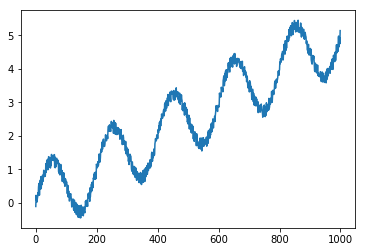

In [7]:
x = np.array(range(1000))
noise = np.random.uniform(-0.2,0.2,1000)  
y = np.sin(np.pi*x/100)+x/200+noise
plt.plot(y)


In [50]:
data = {'times':x,'values':y}
reader = NumpyReader(data)

# test the reader and data read in  

with tf.Session() as sess: 
    full_data = reader.read_full()
# typical method to 
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    print(sess.run(full_data))
    coord.request_stop()

{'times': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 17

In [19]:
#use batches to train the data

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(
reader, batch_size = 16, window_size = 40)
# test the readin 
with tf.Session() as sess:
    data = train_input_fn.create_batch()
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess,coord=coord) 
    batch1 = sess.run(data[0])
    batch2 = sess.run(data[0]) 
    coord.request_stop()
print('batch1:',batch1)

batch1: {'times': array([[841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853,
        854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866,
        867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879,
        880],
       [  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40],
       [761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786,
        787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799,
        800],
       [241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
        254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
        267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
        280],
       [481, 482, 483, 484, 485, 486, 487, 488, 48

In [65]:
# setup auto-regression model 
# mind for the window size when define the input variables
armodel = tf.contrib.timeseries.ARRegressor(periodicities =200, 
                                             input_window_size =30, output_window_size = 10, num_features =1,
                                             loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\XChen50\\AppData\\Local\\Temp\\tmp_v6sxk_s', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018CF2057518>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [66]:
# train the model 
armodel.train(input_fn=train_input_fn,steps=6000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\XChen50\AppData\Local\Temp\tmp_v6sxk_s\model.ckpt.
INFO:tensorflow:loss = 1.4940871, step = 1
INFO:tensorflow:global_step/sec: 538.981
INFO:tensorflow:loss = 0.75697404, step = 101 (0.187 sec)
INFO:tensorflow:global_step/sec: 1133.89
INFO:tensorflow:loss = 0.4165294, step = 201 (0.088 sec)
INFO:tensorflow:global_step/sec: 744.283
INFO:tensorflow:loss = -0.13558587, step = 301 (0.133 sec)
INFO:tensorflow:global_step/sec: 554.078
INFO:tensorflow:loss = -0.26243064, step = 401 (0.181 sec)
INFO:tensorflow:global_step/sec: 524.913
INFO:tensorflow:loss = -0.33411336, step = 501 (0.192 sec)
INFO:tensorflow:global_step/sec: 536.175
INFO:tensorflow:loss = -0.1258633, step = 601 (0.184 sec)
INFO:tensorflow:gl

In [67]:
# evaluate the model 
# define the evaluation data input 
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = armodel.evaluate(input_fn=evaluation_input_fn, steps=1)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-17-13:32:30
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XChen50\AppData\Local\Temp\tmp_v6sxk_s\model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-12-17-13:32:30
INFO:tensorflow:Saving dict for global step 6000: covariance = [[[0.02090601]
  [0.01832891]
  [0.01818859]
  [0.01820492]
  [0.02059598]
  [0.02096206]
  [0.02459858]
  [0.02880326]
  [0.02182626]
  [0.02201126]
  [0.02066495]
  [0.02681366]
  [0.02188015]
  [0.01636829]
  [0.0261164 ]
  [0.02083401]
  [0.01934893]
  [0.01605983]
  [0.01655343]
  [0.01435441]
  [0.02018719]
  [0.01979141]
  [0.02238017]
  [0.03064695]
  [0.0227836 ]
  [0.02417957]
  [0.02008755]
  [0.07067528]
  [0.01753476]
  [0.01969991]
  [0.01991053]
  [0.02145443]
  [0.01

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 6000: C:\Users\XChen50\AppData\Local\Temp\tmp_v6sxk_s\model.ckpt-6000


In [68]:
evaluation['mean'] # this record the predicted series 

array([[[ 0.8885691 ],
        [ 1.0986016 ],
        [ 1.0237164 ],
        [ 1.0656892 ],
        [ 1.0802424 ],
        [ 1.0078945 ],
        [ 1.2618974 ],
        [ 1.1988516 ],
        [ 1.0423803 ],
        [ 1.1169053 ],
        [ 1.1771541 ],
        [ 1.2288791 ],
        [ 1.2861664 ],
        [ 1.265502  ],
        [ 1.1370515 ],
        [ 1.2259022 ],
        [ 1.279394  ],
        [ 1.3473552 ],
        [ 1.1368133 ],
        [ 1.3257219 ],
        [ 1.3241446 ],
        [ 1.4178225 ],
        [ 1.2702374 ],
        [ 1.4223105 ],
        [ 1.3519223 ],
        [ 1.1795421 ],
        [ 1.3659685 ],
        [ 1.3537008 ],
        [ 1.2430481 ],
        [ 1.1526161 ],
        [ 1.3816437 ],
        [ 1.4932926 ],
        [ 1.142139  ],
        [ 1.3212935 ],
        [ 1.2630119 ],
        [ 1.2034361 ],
        [ 1.3044343 ],
        [ 1.3357956 ],
        [ 1.1077695 ],
        [ 1.1854444 ],
        [ 1.2598953 ],
        [ 1.255436  ],
        [ 1.0829653 ],
        [ 1

In [69]:
len(evaluation['mean'][0])

970

In [70]:
len(evaluation['times'][0])

970

In [71]:
evaluation['loss']

-1.0029334

In [72]:
# apply the model to predict the next several steps 
(predicts,) = tuple(armodel.predict( input_fn= tf.contrib.timeseries.predict_continuation_input_fn(evaluation,steps=250)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XChen50\AppData\Local\Temp\tmp_v6sxk_s\model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


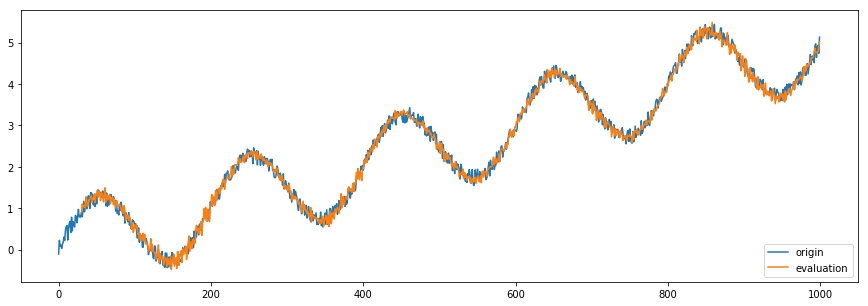

In [73]:
plt.figure(figsize=(15,5))
plt.plot(data['times'].reshape(-1),data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1),label='evaluation')
plt.legend(loc=4)



In [ ]:
# then apply LSTM to train & predict the timeseries 

In [77]:
# construct the series data 
x = np.array(range(1000))
noise = np.random.uniform(-0.2,0.2,1000)
y = np.sin(np.pi*x/50) + np.cos(np.pi*x/50)+np.sin(np.pi*x/25)+noise
data = {'times': x, 'values': y}
reader = NumpyReader(data)



In [94]:
# set up the batch train input; 
train_input_fn_lstm = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size=4, window_size=100) 


In [93]:
# 
from tensorflow.contrib.timeseries.python.timeseries import estimators as ts_estimators

from tensorflow.contrib.timeseries.python.timeseries.estimators import TimeSeriesRegressor

from lstm import _LSTMModel # how the lstm model was build ? 

estimator = ts_estimators.TimeSeriesRegressor(model=_LSTMModel(num_features =1,num_units=128), optimizer=tf.train.AdamOptimizer(0.001))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\XChen50\\AppData\\Local\\Temp\\tmpj7_s8pld', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000018CF23C9A58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [95]:
estimator.train(input_fn= train_input_fn_lstm, steps=2000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\XChen50\AppData\Local\Temp\tmpj7_s8pld\model.ckpt.
INFO:tensorflow:loss = 1.1875471, step = 1
INFO:tensorflow:global_step/sec: 30.5458
INFO:tensorflow:loss = 0.056199703, step = 101 (3.275 sec)
INFO:tensorflow:global_step/sec: 30.9247
INFO:tensorflow:loss = 0.045960225, step = 201 (3.234 sec)
INFO:tensorflow:global_step/sec: 30.753
INFO:tensorflow:loss = 0.031323735, step = 301 (3.252 sec)
INFO:tensorflow:global_step/sec: 30.8673
INFO:tensorflow:loss = 0.06037615, step = 401 (3.241 sec)
INFO:tensorflow:global_step/sec: 30.6868
INFO:tensorflow:loss = 0.02502429, step = 501 (3.259 sec)
INFO:tensorflow:global_step/sec: 29.6557
INFO:tensorflow:loss = 0.050637346, step = 601 (3.371 sec)
INFO:tensorflow:g

In [96]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation_LSTM = estimator.evaluate(input_fn=evaluation_input_fn,steps=1)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-17-14:05:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XChen50\AppData\Local\Temp\tmpj7_s8pld\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-12-17-14:05:35
INFO:tensorflow:Saving dict for global step 2000: global_step = 2000, loss = 0.010558808, mean = [[[-6.02744296e-02]
  [ 9.73113954e-01]
  [ 1.41615856e+00]
  [ 1.34134340e+00]
  [ 1.62083352e+00]
  [ 1.73313069e+00]
  [ 2.00458598e+00]
  [ 1.93461657e+00]
  [ 2.02782297e+00]
  [ 2.21245813e+00]
  [ 2.32001472e+00]
  [ 2.30947685e+00]
  [ 2.28955483e+00]
  [ 2.31290436e+00]
  [ 2.33359528e+00]
  [ 2.30492544e+00]
  [ 2.24165940e+00]
  [ 2.15067649e+00]
  [ 2.04988885e+00]
  [ 1.94961476e+00]
  [ 1.87258220e+00]
  [ 1.73926783e+00]
  [ 1.6061154

INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\XChen50\AppData\Local\Temp\tmpj7_s8pld\model.ckpt-2000


In [100]:
len(evaluation_LSTM['mean'].reshape(-1))

1000

In [97]:
# use the model to predict several steps forward 

(predits,) = tuple(estimator.predict(input_fn=tf.contrib.timeseries.predict_continuation_input_fn(evaluation_LSTM,steps=200))) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\XChen50\AppData\Local\Temp\tmpj7_s8pld\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


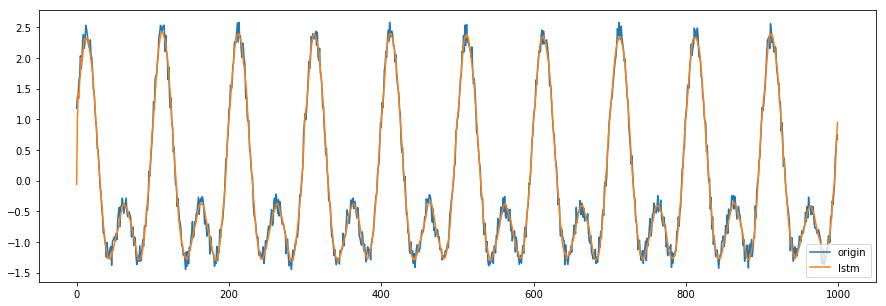

In [105]:
plt.figure(figsize=(15,5))
plt.plot(data['times'].reshape(-1),data['values'].reshape(-1), label='origin')
plt.plot(evaluation_LSTM['times'].reshape(-1),evaluation_LSTM['mean'].reshape(-1),label='lstm')
plt.legend(loc=4)